In [6]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pyproj import Transformer


transformer_gps_isl = Transformer.from_crs("epsg:4326", "epsg:3057" ) # Umbreyta GPS staðsetningu yfir í cartesian hnit fyrir Ísland
transformer_isl_gps = Transformer.from_crs("epsg:3057", "epsg:4326") # Umbreyta cartesian hnitum aftur í GPS hnit


In [291]:
sitecoords = (64.025, -22.636, 45.0)
coords_1475 = (64.1275,-21.902)
radar_x,radar_y = transformer_gps_isl.transform(sitecoords[0],sitecoords[1])
gauge_x,gauge_y = transformer_gps_isl.transform(coords_1475[0],coords_1475[1])

# Lagnir
df_lagnir = gpd.read_file('./OverViewFiles/Lagnir/Lagnir.shp')

df_svaedi = gpd.read_file('./OverViewFiles/Svæðaskipting/Svæðaskipting.shp')

df_mannvirki = gpd.read_file('./OverViewFiles/Mannvirki/Mannvirki.shp')
df_daelustodvar = df_mannvirki.loc[df_mannvirki.HLUTVERK.isin(['Dælustöð']) & df_mannvirki.VEITA.isin(['Fráveita'])]

df_hreinsistodvar = gpd.read_file('./OverViewFiles/Hreinsistöðvar/Hreinsistöðvar.shp')
df_hreinsistodvar_frv = df_hreinsistodvar.loc[ df_hreinsistodvar.HLUTVERK.isin(['Hreinsistöð - grófhreinsun']) & df_hreinsistodvar.VEITA.isin(['Fráveita'])]




# Úrkomumælar
good_sensors = ['1475','1473','1481']
URL_gauge_data = 'C:/Users/sverrirhd/Google Drive/Skóli/DTU/Thesis/Data/Rain gauges/'
df_meta_gauge = np.load(URL_gauge_data + 'sensor_info.npy',allow_pickle=True)
df_meta_gauge = pd.DataFrame(df_meta_gauge,columns = ['Nafn','gerð','nr','nr2','nafn_stutt','svæði','GPS','hæð','ár','Eign','x','y'])
df_meta_gauge.loc[:,'x'] = df_meta_gauge.loc[:,'x'].astype(float)
df_meta_gauge.loc[:,'y'] = df_meta_gauge.loc[:,'y'].astype(float)
df_meta_gauge = df_meta_gauge.drop([14,10],axis=0)
df_meta_gauge.loc[6,'nr'] = '1475'
df_meta_gauge = df_meta_gauge.loc[df_meta_gauge.loc[:,'nr'].isin(good_sensors)]

# Kort
postnr = gpd.read_file('../Radar data analysis/Radar visualization/Shapefiles/postnr/postnrs.shp')


5
6
12


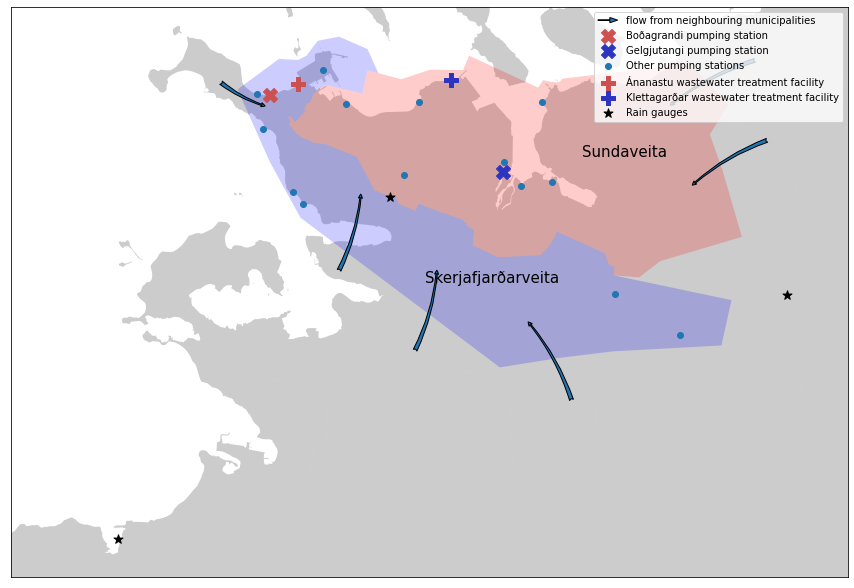

In [304]:
plt.figure(figsize=(15,15))
# Map
postnr.geometry.plot(ax = plt.gca(),alpha = 0.2,color='black')

# Lagnir
# df_lagnir.loc[df_lagnir.INNIHALD == 'Blandað'].plot(ax = plt.gca(),alpha = 0.2,color='green',label='Mixed')
# df_lagnir.loc[df_lagnir.INNIHALD == 'Regnvatn'].plot(ax = plt.gca(),alpha = 0.2,color='blue',label='Rain water')
# df_lagnir.loc[df_lagnir.INNIHALD == 'Skólp'].plot(ax = plt.gca(),alpha = 0.2,color='red',label='Sewage')

# Svæði
svaedi_fontsize = 15
ax = plt.gca()
df_svaedi.loc[[0]].plot(ax =ax,alpha = 0.2,color='Blue',label='Skerjafjarðaveita')
df_svaedi.loc[[1]].plot(ax = ax,alpha = 0.2,color='Red',label='Sundaveita')
df_svaedi.loc[[0]].apply(lambda x: ax.annotate(text=x['HEITI'], xy=np.array(x.geometry.centroid.coords[0]) - [1000,1000],fontsize=svaedi_fontsize), axis=1)
df_svaedi.loc[[1]].apply(lambda x: ax.annotate(text=x['HEITI'], xy=np.array(x.geometry.centroid.coords[0]) + [1000,0],fontsize=svaedi_fontsize), axis=1)

# Dælustöðvar
df_daelustodvar.loc[df_daelustodvar.HEITI.isin(['Dælustöð Gelgjutanga','Dælustöð Boðagranda'])].iloc[[0]].centroid.plot(ax = ax,color='#cc5050',label='Boðagrandi pumping station',marker = 'X',markersize=200)
df_daelustodvar.loc[df_daelustodvar.HEITI.isin(['Dælustöð Gelgjutanga','Dælustöð Boðagranda'])].iloc[[1]].centroid.plot(ax = ax,color='#2d34c2',label='Gelgjutangi pumping station',marker = 'X',markersize=200)
df_daelustodvar.loc[~df_daelustodvar.HEITI.isin(['Dælustöð Gelgjutanga','Dælustöð Boðagranda'])].centroid.plot(ax = ax,label='Other pumping stations')
# df_daelustodvar.loc[df_daelustodvar.HEITI.isin(['Dælustöð Gelgjutanga','Dælustöð Boðagranda'])].centroid.plot(ax = ax,label='Pumping stations',color='Orange')

# Hreinsistöðvar
df_hreinsistodvar_frv.loc[[0]].centroid.plot(ax = ax,color='#cc5050',label='Ánanastu wastewater treatment facility',marker = 'P',markersize=200)
df_hreinsistodvar_frv.loc[[6]].centroid.plot(ax = ax,color='#2d34c2',label='Klettagarðar wastewater treatment facility',marker = 'P',markersize=200)

# df_hreinsistodvar_frv.loc[df_hreinsistodvar_frv.HEITI.isin(['Dælustöð Gelgjutanga','Dælustöð Boðagranda'])].iloc[[0]].centroid.plot(ax = ax,color='#cc5050',label='Boðagrandi pumping station',marker = 'X',markersize=200)
# df_hreinsistodvar_frv.loc[df_hreinsistodvar_frv.HEITI.isin(['Dælustöð Gelgjutanga','Dælustöð Boðagranda'])].iloc[[1]].centroid.plot(ax = ax,color='#2d34c2',label='Gelgjutangi pumping station',marker = 'X',markersize=200)
# df_hreinsistodvar_frv

# Gauges
for index,row in df_meta_gauge.iterrows():
    tmp_gauge_x,tmp_gauge_y = transformer_gps_isl.transform(row['x'],-row['y'])
    print(index)
    if index == 5: # to include a single gauge in the legend
        gauge_handle_extra = ax.scatter(tmp_gauge_x,tmp_gauge_y,c ='black',marker = '*',s = 90,label='Rain gauges')
    else:
        gauge_handle_extra = ax.scatter(tmp_gauge_x,tmp_gauge_y,c ='black',marker = '*',s = 90)

# Arrows
arrows_from = [(357_300, 404_000),(359_300, 401_900),(363450, 400590),(368300, 409580),(368620, 407480),(354180, 409010)]
arrows_to = [(357_900, 406_100),(359_900, 404_100),(362260, 402730),(365990, 408350),(366570, 406250),(355430, 408350)]

for i,((fx,fy),(tx,ty)) in enumerate(zip(arrows_from,arrows_to)):
    if i == 0:
        arrow_legend = ax.annotate("",
                    xy=(tx,ty), xycoords='data',
                    xytext=(fx,fy), textcoords='data',
                    arrowprops=dict(arrowstyle="fancy",
                                    connectionstyle="arc3,rad=0.1"),
                    label = 'flow from neighbouring municipalities'
                    )
    else:
        ax.annotate("",
                xy=(tx,ty), xycoords='data',
                xytext=(fx,fy), textcoords='data',
                arrowprops=dict(arrowstyle="fancy",
                                connectionstyle="arc3,rad=0.1"),
                )
arrow = plt.arrow(0,0, 0.5, 0.6,  label='flow from neighbouring municipalities', )

ax.set_ylim(gauge_y - 10_000,gauge_y + 5_000)
ax.set_xlim(gauge_x - 10_000,gauge_x + 12_000)
ax.set_xticks([])
ax.set_yticks([])
plt.legend(handler_map={mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow)})
plt.show()

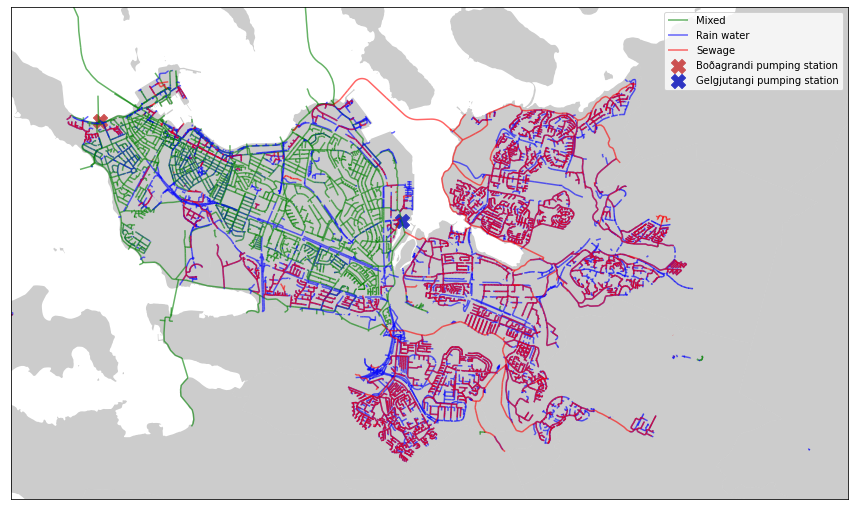

In [286]:
plt.figure(figsize=(15,15))
ax = plt.gca()
# Map
postnr.geometry.plot(ax = plt.gca(),alpha = 0.2,color='black')

# Lagnir
df_lagnir.loc[df_lagnir.INNIHALD == 'Blandað'].plot(ax = plt.gca(),alpha = 0.6,color='green',label='Mixed')
df_lagnir.loc[df_lagnir.INNIHALD == 'Regnvatn'].plot(ax = plt.gca(),alpha = 0.6,color='blue',label='Rain water')
df_lagnir.loc[df_lagnir.INNIHALD == 'Skólp'].plot(ax = plt.gca(),alpha = 0.6,color='red',label='Sewage')

# Svæði
svaedi_fontsize = 15
# df_svaedi.loc[[0]].plot(ax =ax,alpha = 0.2,color='Blue',label='Skerjafjarðaveita')
# df_svaedi.loc[[1]].plot(ax = ax,alpha = 0.2,color='Red',label='Sundaveita')
# df_svaedi.loc[[0]].apply(lambda x: ax.annotate(text=x['HEITI'], xy=np.array(x.geometry.centroid.coords[0]) - [1000,1000],fontsize=svaedi_fontsize), axis=1)
# df_svaedi.loc[[1]].apply(lambda x: ax.annotate(text=x['HEITI'], xy=np.array(x.geometry.centroid.coords[0]) + [1000,0],fontsize=svaedi_fontsize), axis=1)

# Dælustöðvar
x_dael = df_daelustodvar.loc[df_daelustodvar.HEITI.isin(['Dælustöð Gelgjutanga','Dælustöð Boðagranda'])].iloc[[0]].centroid.plot(ax = ax,color='#cc5050',label='Boðagrandi pumping station',marker = 'X',markersize=200)
x_dael = df_daelustodvar.loc[df_daelustodvar.HEITI.isin(['Dælustöð Gelgjutanga','Dælustöð Boðagranda'])].iloc[[1]].centroid.plot(ax = ax,color='#2d34c2',label='Gelgjutangi pumping station',marker = 'X',markersize=200)
# df_daelustodvar.loc[~df_daelustodvar.HEITI.isin(['Dælustöð Gelgjutanga','Dælustöð Boðagranda'])].centroid.plot(ax = ax,label='Other pumping stations')
# df_daelustodvar.loc[df_daelustodvar.HEITI.isin(['Dælustöð Gelgjutanga','Dælustöð Boðagranda'])].centroid.plot(ax = ax,label='Pumping stations',color='Orange')

# Gauges
# for index,row in df_meta_gauge.iterrows():
#     tmp_gauge_x,tmp_gauge_y = transformer_gps_isl.transform(row['x'],-row['y'])
#     print(index)
#     if index == 5: # to include a single gauge in the legend
#         gauge_handle_extra = ax.scatter(tmp_gauge_x,tmp_gauge_y,c ='black',marker = '*',s = 90,label='Rain gauges')
#     else:
#         gauge_handle_extra = ax.scatter(tmp_gauge_x,tmp_gauge_y,c ='black',marker = '*',s = 90)

# Arrows
arrows_from = [(357_300, 404_000),(359_300, 401_900),(363450, 400590),(368300, 409580),(368620, 407480),(354180, 409010)]
arrows_to = [(357_900, 406_100),(359_900, 404_100),(362260, 402730),(365990, 408350),(366570, 406250),(355430, 408350)]

# for i,((fx,fy),(tx,ty)) in enumerate(zip(arrows_from,arrows_to)):
#     if i == 0:
#         arrow_legend = ax.annotate("",
#                     xy=(tx,ty), xycoords='data',
#                     xytext=(fx,fy), textcoords='data',
#                     arrowprops=dict(arrowstyle="fancy",
#                                     connectionstyle="arc3,rad=0.1"),
#                     label = 'flow from neighbouring municipalities'
#                     )
#     else:
#         ax.annotate("",
#                 xy=(tx,ty), xycoords='data',
#                 xytext=(fx,fy), textcoords='data',
#                 arrowprops=dict(arrowstyle="fancy",
#                                 connectionstyle="arc3,rad=0.1"),
#                 )
# arrow = plt.arrow(0,0, 0.5, 0.6,  label='flow from neighbouring municipalities', )

ax.set_ylim(gauge_y - 5_000,gauge_y + 5_000)
ax.set_xlim(gauge_x - 5_000,gauge_x + 12_000)
ax.set_xticks([])
ax.set_yticks([])
plt.legend(handler_map={mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow)})
plt.show()

In [279]:
# %matplotlib widget
%matplotlib inline

No handles with labels found to put in legend.


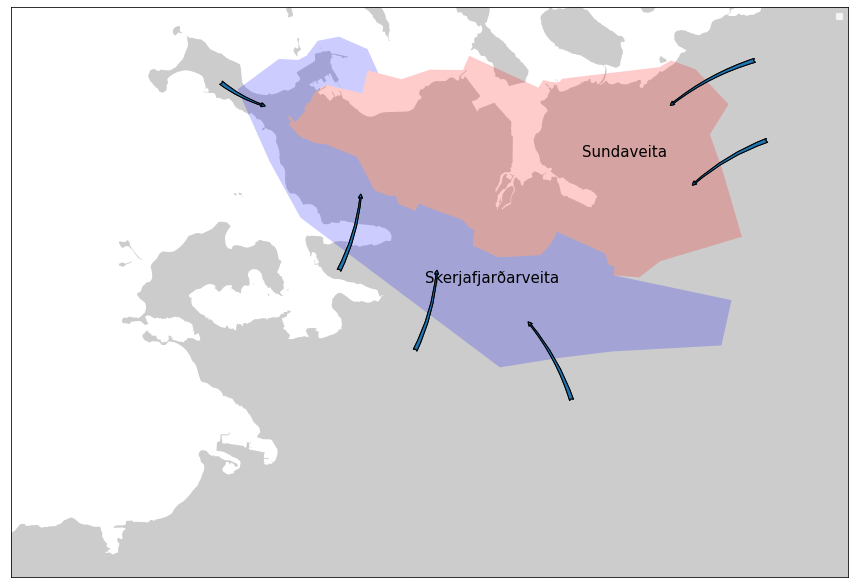

In [280]:
plt.figure(figsize=(15,15))
# Map
postnr.geometry.plot(ax = plt.gca(),alpha = 0.2,color='black')

# Svæði
svaedi_fontsize = 15
ax = plt.gca()
df_svaedi.loc[[0]].plot(ax =ax,alpha = 0.2,color='Blue',label='Skerjafjarðaveita')
df_svaedi.loc[[1]].plot(ax = ax,alpha = 0.2,color='Red',label='Sundaveita')
df_svaedi.loc[[0]].apply(lambda x: ax.annotate(text=x['HEITI'], xy=np.array(x.geometry.centroid.coords[0]) - [1000,1000],fontsize=svaedi_fontsize), axis=1)
df_svaedi.loc[[1]].apply(lambda x: ax.annotate(text=x['HEITI'], xy=np.array(x.geometry.centroid.coords[0]) + [1000,0],fontsize=svaedi_fontsize), axis=1)


arrows_from = [(357_300, 404_000),(359_300, 401_900),(363450, 400590),(368300, 409580),(368620, 407480),(354180, 409010)]
arrows_to = [(357_900, 406_100),(359_900, 404_100),(362260, 402730),(365990, 408350),(366570, 406250),(355430, 408350)]

for i,((fx,fy),(tx,ty)) in enumerate(zip(arrows_from,arrows_to)):
    ax.annotate("",
                xy=(tx,ty), xycoords='data',
                xytext=(fx,fy), textcoords='data',
                arrowprops=dict(arrowstyle="fancy",
                                connectionstyle="arc3,rad=0.1"),
                )
    
    ax.annotate("",
                xy=(tx,ty), xycoords='data',
                xytext=(fx,fy), textcoords='data',
                arrowprops=dict(arrowstyle="fancy",
                                connectionstyle="arc3,rad=0.1"),
                )


ax.set_ylim(gauge_y - 10_000,gauge_y + 5_000)
ax.set_xlim(gauge_x - 10_000,gauge_x + 12_000)
ax.set_xticks([])
ax.set_yticks([])
plt.legend()
plt.show()

In [69]:
df_mannvirki.loc[df_mannvirki.HEITI.isin(['Dælustöð Gelgjutanga','Dælustöð Boðagranda']) & df_mannvirki.VEITA.isin(['Fráveita'])]

,OBJECTID,HLUTVERK,TEGUND,HEITI,STADFANG,VEITA,NR,BYGGINGARA,RAFMAGN,EFNI,...,FM_BREYTT,DAGS_INN,NAKV_XY,NAKV_Z,FLOKKUR_IS,GLOBALID,DMM_HLEKKU,HEITI_FLUT,FNUM,geometry
793,6022580,Dælustöð,Hús,Dælustöð Boðagranda,"Eiðsgrandi 20, 107",Fráveita,8504,0,1,None,...,ÞP,2006-01-27,0.0,0.0,201,{1A2BF528-169F-4328-991F-9E8030A9F82A},None,None,2231292,"POLYGON Z ((355500.436 408677.208 0.000, 35550..."
1325,6021462,Dælustöð,Jarðhýsi,Dælustöð Gelgjutanga,"Gelgjutangi, 104",Fráveita,8511,0,1,None,...,ÞP,2006-01-27,0.0,0.0,201,{511526BB-670C-4079-BD9E-4768082C5614},None,None,2217059,"POLYGON Z ((361634.000 406627.534 0.000, 36163..."


,OBJECTID,HLUTVERK,TEGUND,HEITI,STADFANG,VEITA,NR,BYGGINGARA,RAFMAGN,EFNI,...,FM_BREYTT,DAGS_INN,NAKV_XY,NAKV_Z,FLOKKUR_IS,GLOBALID,DMM_HLEKKU,HEITI_FLUT,FNUM,geometry
793,6022580,Dælustöð,Hús,Dælustöð Boðagranda,"Eiðsgrandi 20, 107",Fráveita,8504,0,1,None,...,ÞP,2006-01-27,0.0,0.0,201,{1A2BF528-169F-4328-991F-9E8030A9F82A},None,None,2231292,"POLYGON Z ((355500.436 408677.208 0.000, 35550..."
1325,6021462,Dælustöð,Jarðhýsi,Dælustöð Gelgjutanga,"Gelgjutangi, 104",Fráveita,8511,0,1,None,...,ÞP,2006-01-27,0.0,0.0,201,{511526BB-670C-4079-BD9E-4768082C5614},None,None,2217059,"POLYGON Z ((361634.000 406627.534 0.000, 36163..."
